<a href="https://colab.research.google.com/github/100477706/Proyecto2_Aprendizaje/blob/main/Clustering_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. IDENTIFICACIÓN DE ESTUDIANTES**

---

**Grupo de Trabajo:** 27

Gabriel José Rivera Amor - 100477706@alumnos.uc3m.es

Santiago José Díaz Rodríguez - 100479095@alumnos.uc3m.es

**Enlace Github:** https://github.com/100477706/Proyecto2_Aprendizaje.git

# **1. CARGA DE DATOS**

---

Mediante este apartado realizamos la carga de datos al Google Collab teniendo en cuenta que en cada ingreso a la aplicación se debe realizar la carga del dataset.

En este apartado se descomprime el archivo que se ha subido y se muestran los datos por pantalla.

In [ ]:
!ls

sample_data  semillas.csv


In [12]:
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np

In [13]:
df = pd.read_csv("semillas.csv", sep=",") #subir el archivo de semillas
df.head()

,area,perimetro,compacidad,longitud,anchura,asimetria,surco,clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Como estamos haciendo un proceso de clustering, es necesario "eliminar" de los datos cargados dicha columna, ya que nosotros estamos buscando etiquetar a la clase a la que pertencen cada uno de los elementos.

In [21]:
# Columna a eliminar para el clustering
delete_cols = ['clase']

# Retiramos la columna con la función drop
df_c = df.drop(columns=delete_cols)

# Definimos la data a utilizar
X = df_c
y = df['clase']

# Mostramos nuevamenete el dataset para verificar que se ha eliminado la columna
df_c.head()

,area,perimetro,compacidad,longitud,anchura,asimetria,surco
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


# **2. PRINCIPAL COMPONENT ANALYSIS (PCA)**

---

El clustering es una técnica de aprendizaje no supervisado, la cual consiste en organizar un conjunto de datos en grupos, de tal forma que todos los elementos del grupo sean similares entre sí y los datos de grupos diferentes sean lo más distinto posible.

Por ello, primeramente es necesario elegir un escaldor para realizar el proceso de normalización de los datos presentes en el dataset. Sin embargo, los datos pueden tener muchas dimensiones, por lo que hacemos uso de PCA para poder reducir la dimensionalidad a dos dimensiones y poder graficarlos.

Para que podamos reducir efectivamente la dimensionalidad, queremos que pocas componentes, se pueda observar la mayor proporción de varianza posible, ya que representa la mayor cantidad de información o dispersión que tienen los datos.

Para ello, procedemos a visualizar con cada uno de los escaladores, la varianza obtenida y la acumulada mientras aumentamos el número de componentes. Es importante decir que solo gestionaremos PCA con dos componentes como se ha indicado en el enunciado.

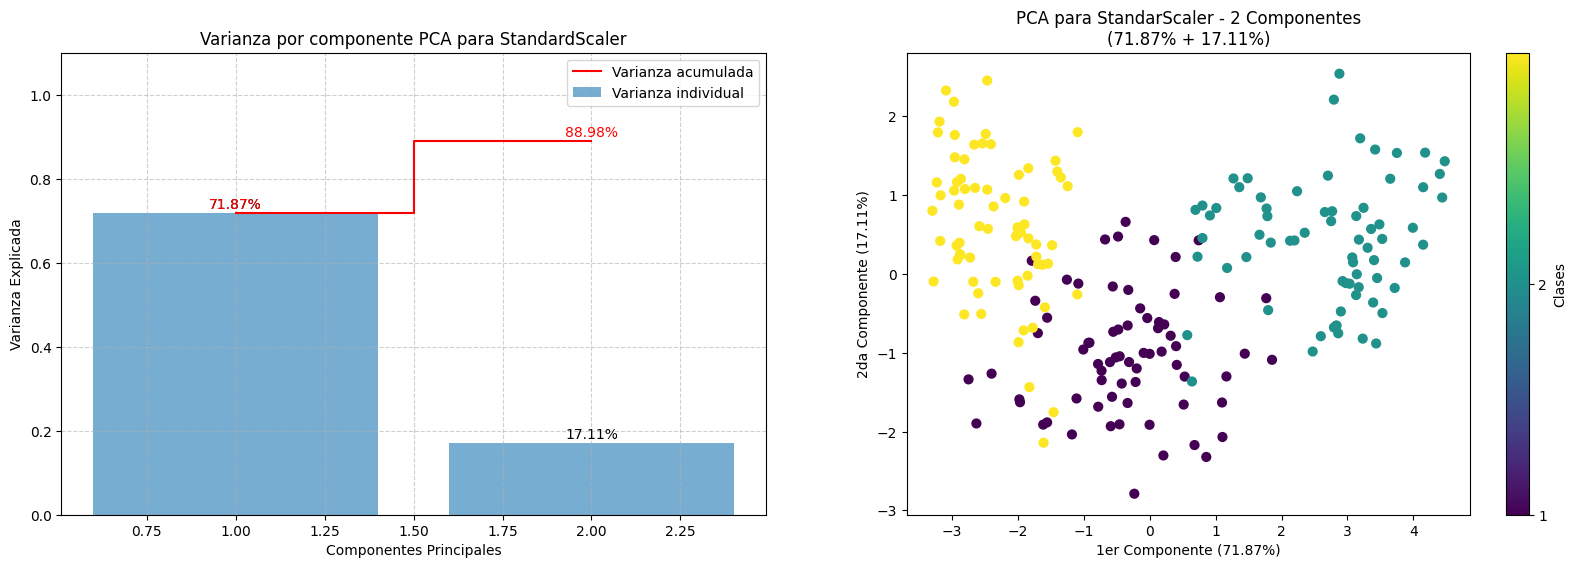

In [35]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Ajustar el espacio entre subplots (wspace: espacio horizontal)
plt.subplots_adjust(wspace=0.2)  # Aumentá el valor para más separación

# Plot de Varianza Explicada
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    axes[0].text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    axes[0].text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza por componente PCA para StandardScaler')
axes[0].legend(loc='best')
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot de PCA (scatter)
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
axes[1].set_title(f'PCA para StandarScaler - 2 Componentes\n({explained_variance[0]:.2%} + {explained_variance[1]:.2%})')
axes[1].set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
axes[1].set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

# Barra de color
fig.colorbar(scatter, ax=axes[1], ticks=range(3), label='Clases')
plt.show()


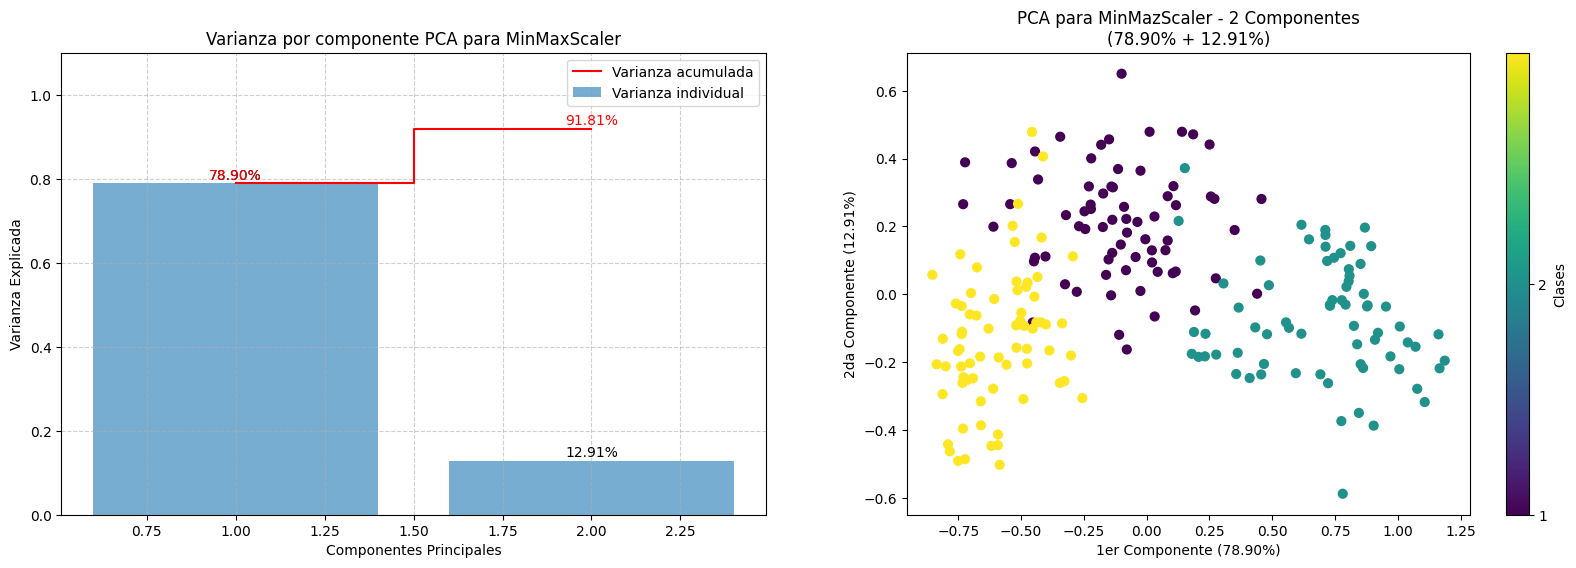

In [37]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Ajustar el espacio entre subplots (wspace: espacio horizontal)
plt.subplots_adjust(wspace=0.2)  # Aumentá el valor para más separación

# Plot de Varianza Explicada
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    axes[0].text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    axes[0].text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza por componente PCA para MinMaxScaler')
axes[0].legend(loc='best')
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot de PCA (scatter)
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
axes[1].set_title(f'PCA para MinMaxScaler - 2 Componentes\n({explained_variance[0]:.2%} + {explained_variance[1]:.2%})')
axes[1].set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
axes[1].set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

# Barra de color
fig.colorbar(scatter, ax=axes[1], ticks=range(3), label='Clases')
plt.show()


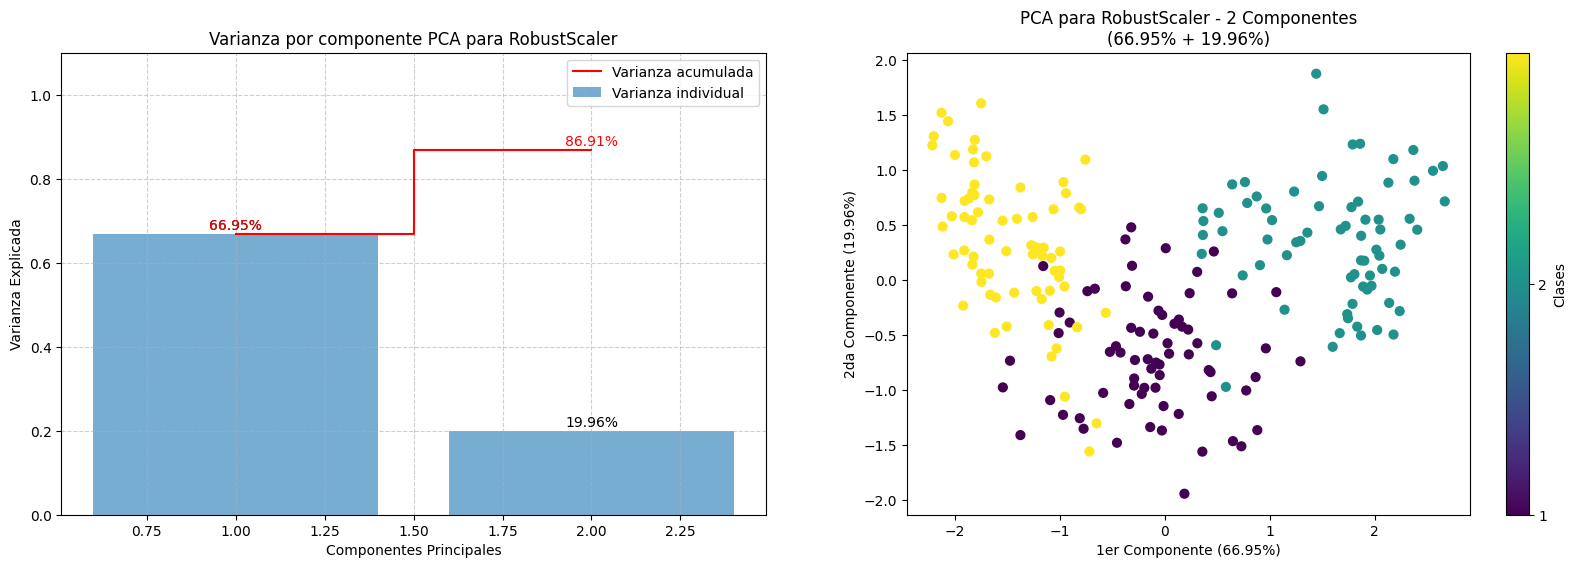

In [38]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Ajustar el espacio entre subplots (wspace: espacio horizontal)
plt.subplots_adjust(wspace=0.2)  # Aumentá el valor para más separación

# Plot de Varianza Explicada
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    axes[0].text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    axes[0].text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza por componente PCA para RobustScaler')
axes[0].legend(loc='best')
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot de PCA (scatter)
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
axes[1].set_title(f'PCA para RobustScaler - 2 Componentes\n({explained_variance[0]:.2%} + {explained_variance[1]:.2%})')
axes[1].set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
axes[1].set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

# Barra de color
fig.colorbar(scatter, ax=axes[1], ticks=range(3), label='Clases')
plt.show()

Después de visualizar los resultados obtenidos mediante el uso de PCA, se puede verificar los diferentes valores de varianza y varianza acumulada según el número de componentes que se consideren. Para el caso de nuestro ejercicio, se considera que el número de componenetes a considerar es de 2, lo cual permite visiauizar los resutados en dos dimensiones.

Analizando los resultados anteriores podemos afirmar que aquel escalador con mejor varianza acumulada y el cual utilizaremos para aplicar las técnicas de Clustering es el MinMaxScaler con un 91.81%

# **3. TÉCNICAS DE CLUSTERING**

---